# Sistem Rekomendasi Game Pada Platform Steam

## Download Dataset Dari Kaggle

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fronkongames/steam-games-dataset/

Dataset URL: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset/versions/
License(s): MIT
 96% 203M/211M [00:02<00:00, 104MB/s] 
100% 211M/211M [00:02<00:00, 94.6MB/s]


In [ ]:
!unzip -q steam-games-dataset.zip

## Memahami Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
users_df = pd.read_csv('users.csv')

users_df.sample(5)

,UserID,AppID,Playtime,Rating,IsRecommended
182,6500300905025287,1422450,48.0,2,1
1,2261676974623107,444200,2.0,4,1
416,1531348986262506,632470,11.0,5,1
216,4854544095951904,287450,1.0,4,1
9,5664458204981563,431960,15.0,5,1


In [ ]:
column_names = [
    "AppID", "Name", "Release date", "Estimated owners", "Peak CCU",
    "Required age", "Price", "Discount", "DLC count", "About the game",
    "Supported languages", "Full audio languages", "Reviews", "Header image",
    "Website", "Support url", "Support email", "Windows", "Mac", "Linux",
    "Metacritic score", "Metacritic url", "User score", "Positive",
    "Negative", "Score rank", "Achievements", "Recommendations", "Notes",
    "Average playtime forever", "Average playtime two weeks",
    "Median playtime forever", "Median playtime two weeks", "Developers",
    "Publishers", "Categories", "Genres", "Tags", "Screenshots", "Movies"
]

games_df = pd.read_csv('games.csv', names=column_names, header=0, index_col=False)


# selected_columns = [
#     "AppID", "Name", "Price", "Publishers", "Developers", "Categories", "Genres", "Tags", "Recommendations"
# ]

# games_df = games_df[selected_columns]

games_df.sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
68785,1459260,Techlie,"Jan 18, 2023",0 - 20000,0,0,8.99,0,0,Techlie is a first-person shooter action game ...,...,0,0,0,Seyyid Halil KAYA,Seyyid Halil KAYA,Single-player,"Action,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
36126,1610410,MR 333,"May 8, 2021",0 - 0,0,0,0.00,0,0,When the ritual begins it is feeding time. Fro...,...,0,0,0,Bry Guy Studios,Bry Guy Studios,Single-player,Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
61721,2076200,NYYO,"Jul 26, 2022",0 - 20000,0,0,7.99,0,0,"The Hero, the Legend, and the Villain Prepare ...",...,0,0,0,Amita Innovation,"Amita Innovation,Opendream","Single-player,Full controller support","Action,Adventure,RPG","Adventure,Action,RPG,Puzzle,Action RPG,Action-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
18348,909630,Desktop Dynasties: Pro Football,"Mar 8, 2019",0 - 20000,0,0,0.99,0,0,Desktop Dynasties: Pro Football is an American...,...,0,0,0,GoldenCrest Games,GoldenCrest Games,Single-player,"Casual,Indie,Simulation,Sports,Strategy","Casual,Indie,Simulation,Sports,Strategy",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
35421,1145380,Kakatte Koi Yo!,"Apr 30, 2021",0 - 20000,0,0,4.99,0,0,"CATS, FISH, AND BOMBS! Kakatte Koi Yo! is a pl...",...,0,0,0,BackSlash Games,BackSlash Games,"Single-player,Multi-player,PvP,Shared/Split Sc...","Action,Casual,Strategy","Cats,2D Fighter,Funny,2D Platformer,4 Player L...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
updated_name = 'Counter-Strike 2'
updated_dev = 'Valve'
updated_tags = ('FPS, Shooter, Multiplayer, Competitive, Action, Team-Based, eSports, Tactical, '
                'First-Person, PvP, Online Co-Op, Co-op, Strategy, Military, War, Difficult, '
                'Trading, Realistic, Fast-Paced, Moddable')
updated_categories = ('Cross-Platform Multiplayer, Steam Trading Cards, Steam Workshop, '
                      'In-App Purchases, Stats, Remote Play on Phone, Remote Play on Tablet, '
                      'Remote Play on TV, Steam Timeline, Multi-player, Valve Anti-Cheat, '
                      'Native Steam Controller, Cloud Gaming, Cloud Gaming (NVIDIA)')

games_df.loc[games_df['AppID'] == 730, 'Name'] = updated_name
games_df.loc[games_df['AppID'] == 730, 'Developers'] = updated_dev
games_df.loc[games_df['AppID'] == 730, 'Tags'] = updated_tags
games_df.loc[games_df['AppID'] == 730, 'Categories'] = updated_categories

In [ ]:
check = games_df[games_df['AppID'] == 730]
check

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
46158,730,Counter-Strike 2,"Aug 21, 2012",50000000 - 100000000,825215,0,0.0,0,1,Counter-Strike: Global Offensive (CS: GO) expa...,...,777,6357,253,Valve,Valve,"Cross-Platform Multiplayer, Steam Trading Card...","Action,Free to Play","FPS, Shooter, Multiplayer, Competitive, Action...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/8...


In [ ]:
filter_average_playtime = games_df['Average playtime two weeks'] > 0
average_check = games_df[filter_average_playtime]
average_check

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
47,552520,Far Cry® 5,"Mar 26, 2018",2000000 - 5000000,2164,17,59.99,0,5,Far Cry comes to America in the latest install...,...,223,1258,311,"Ubisoft Montreal,Red Storm,Ubisoft Shanghai,Ub...",Ubisoft,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Open World,Co-op,Action,Multiplayer,FPS,Shoote...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
57,1293830,Forza Horizon 4,"Mar 9, 2021",2000000 - 5000000,7571,0,59.99,0,15,Dynamic seasons change everything at the world...,...,230,1021,130,Playground Games,Xbox Game Studios,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Racing,"Racing,Open World,Driving,Multiplayer,Online C...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
66,12140,Max Payne,"Jan 6, 2011",500000 - 1000000,49,17,3.49,0,0,Max Payne is a man with nothing to lose in the...,...,79,80,79,Remedy Entertainment,Rockstar Games,Single-player,Action,"Action,Noir,Classic,Third-Person Shooter,Bulle...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
71,541570,Sally Face - Episode One,"Dec 14, 2016",500000 - 1000000,133,0,2.99,0,1,A DARK MYSTERY IS UNFOLDING... Delve into an u...,...,20,295,20,Portable Moose,Portable Moose,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Story Rich,Psychological Horror,Dark,Horror,In...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
93,1066890,Automobilista 2,"Jun 30, 2020",200000 - 500000,358,0,23.99,0,11,Automobilista 2 is the culmination of a projec...,...,24,2606,24,Reiza Studios,Reiza Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97000,1672500,GUNDAM BREAKER 4,"Aug 28, 2024",100000 - 200000,21237,0,59.99,0,4,Create your own ultimate Gundam in the newest ...,...,409,673,673,"CRAFTS ＆ MEISTER Co., Ltd",Bandai Namco Entertainment Inc.,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,RPG","Action,Hack and Slash,Robots,RPG,Action RPG,Me...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97023,1040200,Crime Scene Cleaner,"Aug 14, 2024",200000 - 500000,3951,0,19.99,0,1,When insurance companies dodge the responsibil...,...,196,256,256,President Studio,"President Studio,PlayWay S.A.","Single-player,Steam Achievements,Full controll...","Action,Simulation","Crime,Simulation,Gore,Singleplayer,First-Perso...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97161,1575940,Sins of a Solar Empire II,"Aug 15, 2024",100000 - 200000,5654,0,49.99,0,0,Sins of a Solar Empire II is the sequel to the...,...,126,151,151,"Ironclad Games Corporation,Stardock Entertainment",Stardock Entertainment,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Simulation,Strategy","Strategy,Space,4X,RTS,Sci-fi,Multiplayer,Singl...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
97235,2366980,Thank Goodness You're Here!,"Aug 1, 2024",50000 - 100000,216,0,19.99,0,0,NaN,...,265,265,265,Coal Supper,Panic,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie","Adventure,Comedy,Hand-drawn,Funny,Exploration,...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [ ]:
# selected_columns = [
#     "AppID", "Name", "Price", "Publishers", "Developers", "Categories", "Genres", "Tags", "Average playtime two weeks"
# ]
# req_check = average_check[selected_columns]

req_check = average_check
req_check.sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
42024,238320,Outlast,"Sep 4, 2013",2000000 - 5000000,359,0,19.99,0,1,Hell is an experiment you can't survive in Out...,...,70,162,83,Red Barrels,Red Barrels,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie","Horror,First-Person,Survival Horror,Atmospheri...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
23867,552500,Warhammer: Vermintide 2,"Mar 8, 2018",2000000 - 5000000,5603,0,29.99,0,14,Warhammer: Vermintide 2 is a 4-player co-op ac...,...,443,615,384,Fatshark,Fatshark,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Indie","Games Workshop,First-Person,Co-op,Dark Fantasy...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
77752,1888160,ARMORED CORE™ VI FIRES OF RUBICON™,"Aug 24, 2023",500000 - 1000000,85852,13,59.99,0,0,Combining FromSoftware’s longstanding expertis...,...,716,556,556,FromSoftware Inc.,"FromSoftware Inc.,Bandai Namco Entertainment Inc.","Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"Mechs,Character Customization,Third Person,3D,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71378,1593030,Terra Nil,"Mar 28, 2023",50000 - 100000,2825,0,24.99,0,2,Terra Nil is a game about transforming a barre...,...,523,706,706,Free Lives,Devolver Digital,"Single-player,Steam Achievements,Steam Cloud","Casual,Indie,Strategy","Nature,Strategy,Relaxing,City Builder,Procedur...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4579,245280,ENSLAVED™: Odyssey to the West™ Premium Edition,"Oct 24, 2013",200000 - 500000,13,0,19.99,0,0,"Follow a gripping, surprise-filled journey as ...",...,1,210,1,Ninja Theory,BANDAI NAMCO Entertainment,"Single-player,Steam Achievements,Full controll...","Action,Adventure","Adventure,Action,Post-apocalyptic,Story Rich,S...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [ ]:
req_check.to_csv('steam.csv', index=False)

In [ ]:
# Cek kolom di users_df
print("Kolom di users_df:", users_df.columns)

# Cek kolom di games_df
print("Kolom di games_df:", games_df.columns)

Kolom di users_df: Index(['UserID', 'AppID', 'Playtime', 'Rating', 'IsRecommended'], dtype='object')
Kolom di games_df: Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'Discount', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')


In [ ]:
selected_columns_for_merge = ['AppID', 'Name', 'Release date', 'Price', 'About the game', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags']
short_games_df = games_df[selected_columns_for_merge]

user_with_games_df = pd.merge(users_df, short_games_df, on='AppID', how='inner')

user_with_games_df

,UserID,AppID,Playtime,Rating,IsRecommended,Name,Release date,Price,About the game,Developers,Publishers,Categories,Genres,Tags
0,2261676974623107,1238810,2.0,4,1,Battlefield V,"Oct 22, 2020",14.99,This is the ultimate Battlefield V experience....,DICE,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"FPS,World War II,Shooter,Multiplayer,Singlepla..."
1,2261676974623107,444200,2.0,4,1,World of Tanks Blitz,"Nov 9, 2016",0.00,Jump into a free-to-play MMO action shooter fe...,Wargaming Group Limited,Wargaming Group Limited,"Multi-player,MMO,PvP,Online PvP,Co-op,Online C...","Action,Free to Play,Massively Multiplayer","Tanks,Free to Play,Action,Multiplayer,World Wa..."
2,2261676974623107,242760,2.0,3,1,The Forest,"Apr 30, 2018",19.99,"As the lone survivor of a passenger jet crash,...",Endnight Games Ltd,Endnight Games Ltd,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,Indie,Simulation","Open World Survival Craft,Survival,Open World,..."
3,2261676974623107,2668080,3.0,4,1,Snowbreak: Containment Zone,"Dec 24, 2023",0.00,Snowbreak: Containment Zone is a 3D sci-fi RPG...,Amazing Seasun Games,Amazing Seasun Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure,RPG",NaN
4,2261676974623107,1222680,1.0,3,1,Need for Speed™ Heat,"Jun 4, 2020",69.99,A thrilling race experience pits you against a...,Ghost Games,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Racing,Sports","Racing,Open World,Driving,Multiplayer,Action,A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,2443289361417818,648800,60.0,4,0,Raft,"Jun 20, 2022",19.99,"By yourself or with friends, your mission is t...",Redbeet Interactive,Axolot Games,"Single-player,Multi-player,Co-op,Online Co-op,...","Adventure,Indie,Simulation","Survival,Open World Survival Craft,Multiplayer..."
765,4746043026050732,1259970,1.0,4,1,eFootball PES 2021 SEASON UPDATE,"Sep 15, 2020",0.00,'Please note that the latest data for certain ...,Konami Digital Entertainment,Konami Digital Entertainment,"Single-player,Multi-player,PvP,Online PvP,Shar...",Sports,"Sports,Football (Soccer),Multiplayer,e-sports,..."
766,4746043026050732,945360,1.0,3,1,Among Us,"Nov 16, 2018",3.99,Play with 4-15 player online or via local WiFi...,Innersloth,Innersloth,"Multi-player,PvP,Online PvP,LAN PvP,Co-op,Onli...",Casual,"Multiplayer,Online Co-Op,Social Deduction,Spac..."
767,4746043026050732,1811260,1.0,3,1,EA SPORTS™ FIFA 23,"Sep 29, 2022",69.99,The World’s Game EA SPORTS™ FIFA 23 brings The...,EA Canada & EA Romania,Electronic Arts,"Single-player,Multi-player,PvP,Online PvP,Shar...","Simulation,Sports","Immersive Sim,Sports,Soccer,Football,Managemen..."


In [ ]:
user_with_games_df.to_csv('user_with_games.csv', index=False)

## Neural Collaborative Filtering

### 1. Cleaning Data

In [3]:
users_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi:",  users_df.duplicated().sum())

Jumlah duplikasi: 0


In [4]:
users_df = users_df.fillna(0.1)

In [5]:
users_df.isnull().sum()

,0
UserID,0
AppID,0
Playtime,0
Rating,0
IsRecommended,0


### 2. Pre-processing

In [6]:
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
users_df['user'] = user_encoder.fit_transform(users_df['UserID'])
user_ids = user_encoder.classes_
n_users = len(user_ids)

app_encoder = LabelEncoder()
users_df['app'] = app_encoder.fit_transform(users_df['AppID'])
app_ids = app_encoder.classes_
n_app = len(app_ids)

user_encoded = dict(zip(user_encoder.classes_, user_encoder.transform(user_encoder.classes_)))
back_user_encoded = dict(zip(user_encoder.transform(user_encoder.classes_), user_encoder.classes_))

app_encoded = dict(zip(app_encoder.classes_, app_encoder.transform(app_encoder.classes_)))
back_app_encoded = dict(zip(app_encoder.transform(app_encoder.classes_), app_encoder.classes_))

print(f"Jumlah user: {n_users}, Jumlah game: {n_app}")

Jumlah user: 165, Jumlah game: 345


In [7]:
print("User ID range:", users_df['user'].min(), "to", users_df['user'].max())
print("App ID range:", users_df['app'].min(), "to", users_df['app'].max())

users_df['user'] = users_df['user'].astype('int32')
users_df['app'] = users_df['app'].astype('int32')

User ID range: 0 to 164
App ID range: 0 to 344


In [28]:
users_df = users_df.sample(frac=1, random_state=46)

X = users_df[['user', 'app']].values
y = users_df['IsRecommended']

X.shape, y.shape

((805, 2), (805,))

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Train set: {}".format(len(y_train)))
print("Test set: {}".format(len(y_test)))

Train set: 644
Test set: 161


In [23]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X_train[:, 0] = scaler.fit_transform(X_train[:, 0].reshape(-1, 1)).flatten()
# X_train[:, 1] = scaler.fit_transform(X_train[:, 1].reshape(-1, 1)).flatten()
# X_test[:, 0] = scaler.transform(X_test[:, 0].reshape(-1, 1)).flatten()
# X_test[:, 1] = scaler.transform(X_test[:, 1].reshape(-1, 1)).flatten()

In [30]:
X_train[:, 0]

array([104, 134,  82, 156,  73,  60,  49,  74,  63,  14, 139,  81,  81,
        66,   1, 133,  38,  33,  59,  13, 133,   5, 132,  22, 152, 164,
        28,  25,  43,  12,  30,  67, 135, 144,  89,  72,  33,  63, 101,
        32,  43,   7,   9, 123,  91,  90, 110,  17,  92,  93, 103, 141,
        93,  99, 135,  19,  19,  93,  53, 153,  27, 126, 125,  37, 151,
       161,  84,  67, 113, 132,  52,  49, 119, 111, 161,  51,  86,  23,
       157,  97, 151, 161,   9,  56,  65, 148, 145, 153,  95,  43,  68,
        82,  85, 134,  39,  14,  52, 107,  76,  88,  78,  38,  68, 109,
       157,  95,  44,  41, 162, 131,  95,  96,  29,  54,  90,  74, 128,
        16, 126,  47,  46,  25,  48, 140, 160, 159,  31,  86, 161, 147,
        35, 162,  46, 149,  95, 100,  81, 138, 154,  75,  89, 133, 146,
        44,   3, 112, 101, 135, 125,  54, 101,  40, 124,  29,  48, 143,
       100, 100,  68, 164, 132, 106,  84, 106, 125, 119,  80, 162,  22,
       120,  31, 140, 157, 156, 130, 105,  82,  91, 146,  45, 12

### 3. Membuat Model

In [37]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
def mse(y_true, y_pred):
  y_true = tf.cast(y_true, tf.float32)
  # Hitung selisih
  error = y_true - y_pred
  # Kuadratkan selisih
  squared_error = tf.square(error)
  # Jumlahkan semua elemen
  sum_squared_error = tf.reduce_sum(squared_error)
  # Hitung jumlah elemen (n)
  n = tf.cast(tf.size(y_true), tf.float32)  # Pastikan dalam bentuk float
  # Bagikan jumlah kuadrat dengan n
  mse = sum_squared_error / n
  return mse

def rmse(y_true, y_pred):
  mse_value = mse(y_true, y_pred)
  # Hitung akar mse
  rmse = tf.sqrt(mse_value)
  return rmse

def RecommenderNet(n_users, n_app, embedding_size=32):
  user_input = Input(shape=(1,), name='user')
  user_embedding = Embedding(n_users + 1, embedding_size, name='user_embedding')(user_input)
  app_input = Input(shape=(1,), name='app')
  app_embedding = Embedding(n_app + 1, embedding_size, name='app_embedding')(app_input)

  concatenate = Concatenate(name='concatenate')([user_embedding, app_embedding])
  flatten = Flatten(name='flatten')(concatenate)

  dense = Dense(128, activation='relu', kernel_regularizer=l2(0.001), name='dense')(flatten)
  batch_norm = BatchNormalization(name='batch_norm')(dense)
  dropout = Dropout(0.3, name='dropout')(batch_norm)

  dense_2 = Dense(64, activation='relu', kernel_regularizer=l2(0.001), name='dense_2')(dropout)
  batch_norm_2 = BatchNormalization(name='batch_norm_2')(dense_2)
  dropout_2 = Dropout(0.3, name='dropout_2')(batch_norm_2)
  output = Dense(1, activation='sigmoid', name='output')(dropout_2)

  model = Model([user_input, app_input], output)

  #menggunakan mse sebelumnya binary crossentropy
  model.compile(loss=mse, optimizer=Adam(learning_rate=0.001), metrics=[rmse])

  return model

model = RecommenderNet(n_users, n_app)

model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)         │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app (InputLayer)          │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ user_embedding            │ (None, 1, 32)          │          5,312 │ user[0][0]             │
│ (Embedding)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ app_embedding (Embedding) │ (None, 1, 32)          │         11,072 │ app[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 1, 64)          │              0 │ user_embedding[0][0],  │
│                           │                        │                │ app_embedding[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 64)             │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 128)            │          8,320 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_norm                │ (None, 128)            │            512 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ batch_norm[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 64)             │          8,256 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_norm_2              │ (None, 64)             │            256 │ dense_2[0][0]          │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 64)             │              0 │ batch_norm_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output (Dense)            │ (None, 1)              │             65 │ dropout_2[0][0]        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 33,793 (132.00 KB)

 Trainable params: 33,409 (130.50 KB)

 Non-trainable params: 384 (1.50 KB)

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

In [39]:
history = model.fit(
    x=[X_train[:, 0], X_train[:, 1]],
    y=y_train,
    epochs=50,
    batch_size=8,
    validation_data=([X_test[:, 0], X_test[:, 1]], y_test),
    callbacks=[early_stopping],
    shuffle=True
)

Epoch 1/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4823 - rmse: 0.5527 - val_loss: 0.3180 - val_rmse: 0.3759
Epoch 2/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3503 - rmse: 0.4239 - val_loss: 0.3007 - val_rmse: 0.3362
Epoch 3/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2662 - rmse: 0.3140 - val_loss: 0.2997 - val_rmse: 0.3223
Epoch 4/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2492 - rmse: 0.2829 - val_loss: 0.2992 - val_rmse: 0.3169
Epoch 5/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2241 - rmse: 0.2521 - val_loss: 0.2989 - val_rmse: 0.3155
Epoch 6/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2190 - rmse: 0.2489 - val_loss: 0.2948 - val_rmse: 0.3165
Epoch 7/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2015 - rmse: 0.2219 - val_loss: 0.2880 - val_rmse: 0.3199
Epoch 8/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1878 - rmse: 0.1965 - val_loss: 0.2762 - val_rmse: 0.3192
Epoch 9/50
81/81 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss

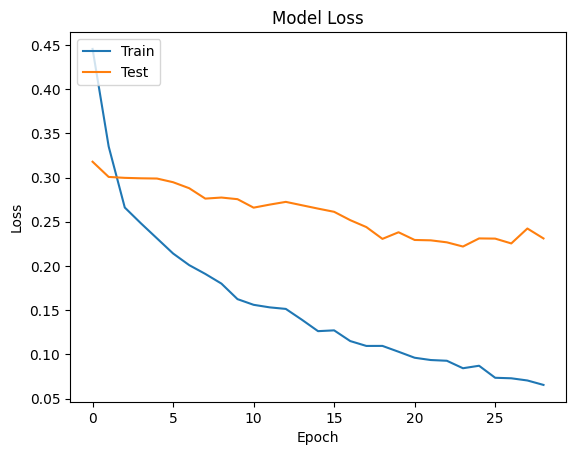

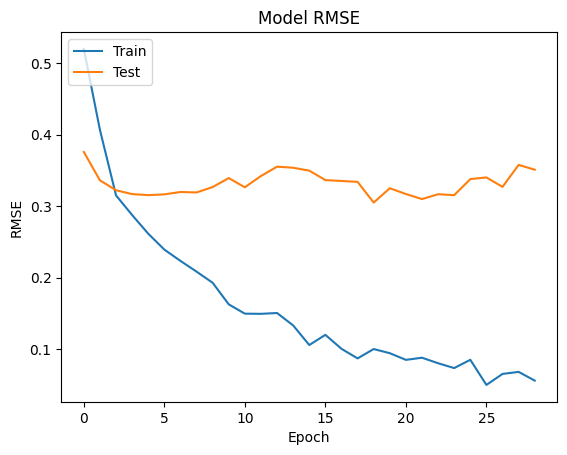

In [40]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# # Plot MSE
# plt.plot(history.history['mse'])
# plt.plot(history.history['val_mse'])
# plt.title('Model MSE')
# plt.ylabel('MSE')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Test'], loc='upper left')
# plt.show()

# Plot RMSE
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Model RMSE')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [41]:
model.save('model/model.h5')

### 4. Prediksi Model

In [42]:
user_counts = users_df['UserID'].value_counts()

good_user = user_counts[user_counts > 1].index

random_user = np.random.choice(good_user)
print(f'Selected user_id: {random_user}')

Selected user_id: 5489009447679493


In [43]:
from tensorflow.keras.models import load_model

model = load_model('model/model.h5')

# random_user = 67

user_with_games_df = pd.read_csv('user_with_games.csv')

user_games = users_df[users_df.UserID == random_user]['AppID'].values

all_games = set(user_with_games_df['AppID'])
unplayed_games = all_games - set(user_games)

user_encoder = user_encoded.get(random_user)
unplayed_game_encoders = [[app_encoded.get(x)] for x in unplayed_games if x in app_encoded]

user_game_array = np.hstack(([[user_encoder]] * len(unplayed_game_encoders), unplayed_game_encoders))
user_game_array = [user_game_array[:, 0], user_game_array[:, 1]]

recommendations = model.predict(user_game_array).flatten()

top_recommendations = (-recommendations).argsort()[:10]


recommended_games_ids = [back_app_encoded.get(unplayed_game_encoders[top_recommendations[x]][0]) for x in range(len(top_recommendations)) if unplayed_game_encoders[top_recommendations[x]][0] in back_app_encoded]

results = []
top_recommendations_ids = []
for index, game_encoder in enumerate(unplayed_game_encoders):
    game_id = back_app_encoded.get(game_encoder[0])
    if game_id in recommended_games_ids:
        top_recommendations_ids.append(game_id)
        try:
            game_info = user_with_games_df[user_with_games_df.AppID == game_id].iloc[0]
            results.append({
                'Name': game_info['Name'],
                'Price': game_info['Price'],
                'Publisher': game_info['Publishers'],
                'Developer': game_info['Developers'],
                'Categories': game_info['Categories'],
                'Genres': game_info['Genres'],
                'Tags': game_info['Tags'],
                'Score': recommendations[index]
            })
        except Exception as e:
            print(f"Error processing game {game_id}: {e}")
            continue

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='Score', ascending=False)
results_df

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


,Name,Price,Publisher,Developer,Categories,Genres,Tags,Score
5,Evil Genius 2: World Domination,39.99,Rebellion,Rebellion,"Single-player,Steam Achievements,Full controll...","Simulation,Strategy","Strategy,Base-Building,Villain Protagonist,Sim...",0.999218
2,Tom Clancy's Rainbow Six® Siege,19.99,Ubisoft,Ubisoft Montreal,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Action,"FPS,Hero Shooter,Multiplayer,Tactical,Shooter,...",0.999122
3,Sea of Thieves,39.99,Xbox Game Studios,Rare Ltd,"Multi-player,PvP,Online PvP,Co-op,Online Co-op...","Action,Adventure","Adventure,Multiplayer,Open World,Pirates,Co-op...",0.998944
9,Titanfall® 2,29.99,Electronic Arts,Respawn Entertainment,"Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"FPS,Multiplayer,Shooter,Action,Mechs,Singlepla...",0.998464
4,Sword of Convallaria,0.00,XD,XD,"Single-player,Full controller support,In-App P...","RPG,Strategy,Free To Play",NaN,0.998154
1,A Space for the Unbound,17.99,Toge Productions,Mojiken,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Pixel Graphics,Exploration,1990's,Atmospheric,...",0.997935
0,Need for Speed™ Heat,69.99,Electronic Arts,Ghost Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Action,Adventure,Racing,Sports","Racing,Open World,Driving,Multiplayer,Action,A...",0.997247
6,eFootball PES 2021 SEASON UPDATE,0.00,Konami Digital Entertainment,Konami Digital Entertainment,"Single-player,Multi-player,PvP,Online PvP,Shar...",Sports,"Sports,Football (Soccer),Multiplayer,e-sports,...",0.997151
8,Sven Co-op,0.00,Sven Co-op team,Sven Co-op team,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,Casual,Free to Play,Indie","FPS,Co-op,Shooter,Online Co-Op,Shoot 'Em Up,Te...",0.997046
7,Ghost of Tsushima DIRECTOR'S CUT,59.99,PlayStation PC LLC,"Sucker Punch Productions,Nixxes Software","Single-player,Multi-player,Co-op,Online Co-op,...","Action,Adventure","Action,Adventure,Open World,Third Person,Story...",0.997031


## Cosine Similarity


### 1. Cleaning Data

In [44]:
steam_df = pd.read_csv('steam.csv')

steam_df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1293830,Forza Horizon 4,"Mar 9, 2021",2000000 - 5000000,7571,0,59.99,0,15,Dynamic seasons change everything at the world...,...,230,1021,130,Playground Games,Xbox Game Studios,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Racing,"Racing,Open World,Driving,Multiplayer,Online C...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,12140,Max Payne,"Jan 6, 2011",500000 - 1000000,49,17,3.49,0,0,Max Payne is a man with nothing to lose in the...,...,79,80,79,Remedy Entertainment,Rockstar Games,Single-player,Action,"Action,Noir,Classic,Third-Person Shooter,Bulle...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
2,541570,Sally Face - Episode One,"Dec 14, 2016",500000 - 1000000,133,0,2.99,0,1,A DARK MYSTERY IS UNFOLDING... Delve into an u...,...,20,295,20,Portable Moose,Portable Moose,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Story Rich,Psychological Horror,Dark,Horror,In...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1066890,Automobilista 2,"Jun 30, 2020",200000 - 500000,358,0,23.99,0,11,Automobilista 2 is the culmination of a projec...,...,24,2606,24,Reiza Studios,Reiza Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,457140,Oxygen Not Included,"Jul 30, 2019",2000000 - 5000000,7507,0,24.99,0,2,In the space-colony simulation game Oxygen Not...,...,1441,1003,2777,Klei Entertainment,Klei Entertainment,"Single-player,Steam Trading Cards","Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1672500,GUNDAM BREAKER 4,"Aug 28, 2024",100000 - 200000,21237,0,59.99,0,4,Create your own ultimate Gundam in the newest ...,...,409,673,673,"CRAFTS ＆ MEISTER Co., Ltd",Bandai Namco Entertainment Inc.,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,RPG","Action,Hack and Slash,Robots,RPG,Action RPG,Me...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1987,1040200,Crime Scene Cleaner,"Aug 14, 2024",200000 - 500000,3951,0,19.99,0,1,When insurance companies dodge the responsibil...,...,196,256,256,President Studio,"President Studio,PlayWay S.A.","Single-player,Steam Achievements,Full controll...","Action,Simulation","Crime,Simulation,Gore,Singleplayer,First-Perso...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1988,1575940,Sins of a Solar Empire II,"Aug 15, 2024",100000 - 200000,5654,0,49.99,0,0,Sins of a Solar Empire II is the sequel to the...,...,126,151,151,"Ironclad Games Corporation,Stardock Entertainment",Stardock Entertainment,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Simulation,Strategy","Strategy,Space,4X,RTS,Sci-fi,Multiplayer,Singl...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1989,2366980,Thank Goodness You're Here!,"Aug 1, 2024",50000 - 100000,216,0,19.99,0,0,NaN,...,265,265,265,Coal Supper,Panic,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie","Adventure,Comedy,Hand-drawn,Funny,Exploration,...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [47]:
keywords_18plus = ['nudity', 'adult']
columns_to_check = ['Categories', 'Genres', 'Tags']

steam_df = steam_df[~steam_df[columns_to_check].apply(
    lambda row: any(row.str.contains('|'.join(keywords_18plus), case=False, na=False)),
    axis=1
)]

steam_df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,Discount,DLC count,About the game,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,1293830,Forza Horizon 4,"Mar 9, 2021",2000000 - 5000000,7571,0,59.99,0,15,Dynamic seasons change everything at the world...,...,230,1021,130,Playground Games,Xbox Game Studios,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Racing,"Racing,Open World,Driving,Multiplayer,Online C...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,12140,Max Payne,"Jan 6, 2011",500000 - 1000000,49,17,3.49,0,0,Max Payne is a man with nothing to lose in the...,...,79,80,79,Remedy Entertainment,Rockstar Games,Single-player,Action,"Action,Noir,Classic,Third-Person Shooter,Bulle...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
2,541570,Sally Face - Episode One,"Dec 14, 2016",500000 - 1000000,133,0,2.99,0,1,A DARK MYSTERY IS UNFOLDING... Delve into an u...,...,20,295,20,Portable Moose,Portable Moose,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Story Rich,Psychological Horror,Dark,Horror,In...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1066890,Automobilista 2,"Jun 30, 2020",200000 - 500000,358,0,23.99,0,11,Automobilista 2 is the culmination of a projec...,...,24,2606,24,Reiza Studios,Reiza Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,457140,Oxygen Not Included,"Jul 30, 2019",2000000 - 5000000,7507,0,24.99,0,2,In the space-colony simulation game Oxygen Not...,...,1441,1003,2777,Klei Entertainment,Klei Entertainment,"Single-player,Steam Trading Cards","Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1986,1672500,GUNDAM BREAKER 4,"Aug 28, 2024",100000 - 200000,21237,0,59.99,0,4,Create your own ultimate Gundam in the newest ...,...,409,673,673,"CRAFTS ＆ MEISTER Co., Ltd",Bandai Namco Entertainment Inc.,"Single-player,Multi-player,Co-op,Online Co-op,...","Action,RPG","Action,Hack and Slash,Robots,RPG,Action RPG,Me...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1987,1040200,Crime Scene Cleaner,"Aug 14, 2024",200000 - 500000,3951,0,19.99,0,1,When insurance companies dodge the responsibil...,...,196,256,256,President Studio,"President Studio,PlayWay S.A.","Single-player,Steam Achievements,Full controll...","Action,Simulation","Crime,Simulation,Gore,Singleplayer,First-Perso...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1988,1575940,Sins of a Solar Empire II,"Aug 15, 2024",100000 - 200000,5654,0,49.99,0,0,Sins of a Solar Empire II is the sequel to the...,...,126,151,151,"Ironclad Games Corporation,Stardock Entertainment",Stardock Entertainment,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Simulation,Strategy","Strategy,Space,4X,RTS,Sci-fi,Multiplayer,Singl...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
1989,2366980,Thank Goodness You're Here!,"Aug 1, 2024",50000 - 100000,216,0,19.99,0,0,NaN,...,265,265,265,Coal Supper,Panic,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie","Adventure,Comedy,Hand-drawn,Funny,Exploration,...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...


In [46]:
steam_df.to_csv('steam.csv', index=False)

In [49]:
selected_columns = [
    "Name", "Price", "Publishers", "Developers", "Categories", "Genres", "Tags"
]

steam_df = steam_df[selected_columns]

steam_df

,Name,Price,Publishers,Developers,Categories,Genres,Tags
0,Forza Horizon 4,59.99,Xbox Game Studios,Playground Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...",Racing,"Racing,Open World,Driving,Multiplayer,Online C..."
1,Max Payne,3.49,Rockstar Games,Remedy Entertainment,Single-player,Action,"Action,Noir,Classic,Third-Person Shooter,Bulle..."
2,Sally Face - Episode One,2.99,Portable Moose,Portable Moose,"Single-player,Steam Achievements,Full controll...","Adventure,Indie","Story Rich,Psychological Horror,Dark,Horror,In..."
3,Automobilista 2,23.99,Reiza Studios,Reiza Studios,"Single-player,Multi-player,PvP,Online PvP,LAN ...","Racing,Simulation,Sports","Racing,Simulation,Sports,VR,Automobile Sim,Dri..."
4,Oxygen Not Included,24.99,Klei Entertainment,Klei Entertainment,"Single-player,Steam Trading Cards","Indie,Simulation","Colony Sim,Base-Building,Survival,Resource Man..."
...,...,...,...,...,...,...,...
1986,GUNDAM BREAKER 4,59.99,Bandai Namco Entertainment Inc.,"CRAFTS ＆ MEISTER Co., Ltd","Single-player,Multi-player,Co-op,Online Co-op,...","Action,RPG","Action,Hack and Slash,Robots,RPG,Action RPG,Me..."
1987,Crime Scene Cleaner,19.99,"President Studio,PlayWay S.A.",President Studio,"Single-player,Steam Achievements,Full controll...","Action,Simulation","Crime,Simulation,Gore,Singleplayer,First-Perso..."
1988,Sins of a Solar Empire II,49.99,Stardock Entertainment,"Ironclad Games Corporation,Stardock Entertainment","Single-player,Multi-player,PvP,Online PvP,LAN ...","Simulation,Strategy","Strategy,Space,4X,RTS,Sci-fi,Multiplayer,Singl..."
1989,Thank Goodness You're Here!,19.99,Panic,Coal Supper,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie","Adventure,Comedy,Hand-drawn,Funny,Exploration,..."


In [50]:
steam_df.isnull().sum()

,0
Name,0
Price,0
Publishers,10
Developers,0
Categories,20
Genres,2
Tags,50


In [51]:
steam_df.fillna('', inplace=True)

<ipython-input-51-703c8392e58d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steam_df.fillna('', inplace=True)


### 2. Seleksi Fitur dan Pre-processing

In [52]:
features_combine = steam_df['Name'] + ' ' + steam_df['Publishers'] + ' ' + steam_df['Developers'] + ' ' + steam_df['Categories'] + ' ' + steam_df['Genres'] + ' ' + steam_df['Tags']

features_combine.sample(5)

,0
474,Raft Axolot Games Redbeet Interactive Single-p...
243,The Village SA Industry Softwaves Single-playe...
1934,Gigantic: Rampage Edition Arc Games Abstractio...
1883,Cities: Skylines II Paradox Interactive Coloss...
1646,"Graze Counter GM Henteko Doujin,Sanuk Inc. Bik..."


In [ ]:
contains_game = features_combine.str.contains('Anime', case=False, na=False)

game_content = features_combine[contains_game]

print(game_content.to_list())


['Puyo Puyo™Tetris® SEGA Sonic Team,Bitbaboon Single-player,Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Shared/Split Screen,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud,Steam Leaderboards,Remote Play on Phone,Remote Play on Tablet,Remote Play on TV,Remote Play Together Action,Casual Puzzle,Casual,Competitive,Multiplayer,Action,Cute,Anime,Local Multiplayer,Colorful,Great Soundtrack,Arcade,2D,Classic,4 Player Local,Difficult,Female Protagonist,Funny,Singleplayer,Fighting,Comedy', "DYNASTY WARRIORS 9 KOEI TECMO GAMES CO., LTD. KOEI TECMO GAMES CO., LTD. Single-player,Multi-player,PvP,Online PvP,Shared/Split Screen PvP,Co-op,Online Co-op,Shared/Split Screen Co-op,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud,Remote Play Together Action Action,Hack and Slash,Open World,Historical,Musou,Action RPG,Singleplayer,Anime,Co-op,Multiplayer,Great Soundtrack,Third Person,RPG,Adventure,Beat 'em up,Online Co-Op,Free to Play", 'Borderle

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word', stop_words=None)

In [54]:
feature_vector = vectorizer.fit_transform(features_combine)
print(feature_vector)

  (0, 1548)	0.3004398091290866
  (0, 1959)	0.2664904321417203
  (0, 4661)	0.2139139859125919
  (0, 1630)	0.12258990199458379
  (0, 4008)	0.12639300136435913
  (0, 3149)	0.2799721406894271
  (0, 1642)	0.0931939799877534
  (0, 3751)	0.04473436247550682
  (0, 3148)	0.08163809755658982
  (0, 2721)	0.06986206202900255
  (0, 3280)	0.26728135712253154
  (0, 2926)	0.23290627839689698
  (0, 782)	0.2258730809959211
  (0, 2930)	0.23107107548451605
  (0, 919)	0.13359429110158222
  (0, 3139)	0.13401166798626188
  (0, 2723)	0.1362466189726773
  (0, 3956)	0.1429183168086591
  (0, 115)	0.053856437982763565
  (0, 1605)	0.07617275051874867
  (0, 853)	0.11975430221494306
  (0, 4054)	0.06047518935314339
  (0, 4277)	0.07778983024869286
  (0, 654)	0.07872896273925442
  (0, 775)	0.06296081214454369
  :	:
  (1990, 313)	0.07655521436168433
  (1990, 3981)	0.08663014711428309
  (1990, 3439)	0.17131039645562823
  (1990, 955)	0.11962469917150399
  (1990, 215)	0.1217400679053055
  (1990, 809)	0.11233447448311765
  

In [55]:
print(vectorizer.vocabulary_)

{'forza': 1548, 'horizon': 1959, 'xbox': 4661, 'game': 1630, 'studios': 4008, 'playground': 3149, 'games': 1642, 'single': 3751, 'player': 3148, 'multi': 2721, 'pvp': 3280, 'online': 2926, 'co': 782, 'op': 2930, 'cross': 919, 'platform': 3139, 'multiplayer': 2723, 'steam': 3956, 'achievements': 115, 'full': 1605, 'controller': 853, 'support': 4054, 'trading': 4277, 'cards': 654, 'cloud': 775, 'racing': 3300, 'open': 2931, 'world': 4638, 'driving': 1203, 'automobile': 334, 'sim': 3736, 'singleplayer': 3752, 'realistic': 3341, 'adventure': 134, 'arcade': 246, 'simulation': 3744, 'exploration': 1384, 'action': 123, 'sports': 3909, 'great': 1755, 'soundtrack': 3865, 'atmospheric': 313, 'first': 1488, 'person': 3074, 'funny': 1612, 'max': 2527, 'payne': 3056, 'rockstar': 3481, 'remedy': 3392, 'entertainment': 1322, 'noir': 2850, 'classic': 760, 'third': 4182, 'shooter': 3708, 'bullet': 606, 'time': 4208, 'story': 3981, 'rich': 3439, 'dark': 989, 'detective': 1077, 'cinematic': 746, 'linear'

In [56]:
feature_vector.shape

(1991, 4799)

### 3. Hitung Cosine Similarity

In [57]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

similarity = cosine_similarity(feature_vector)
print(similarity)

np.save('cosine_similarity.npy', similarity)

[[1.         0.06973502 0.0517286  ... 0.2779554  0.06834661 0.08855657]
 [0.06973502 1.         0.109887   ... 0.06753934 0.03809953 0.06299236]
 [0.0517286  0.109887   1.         ... 0.01646062 0.12200783 0.05829836]
 ...
 [0.2779554  0.06753934 0.01646062 ... 1.         0.03186221 0.07747921]
 [0.06834661 0.03809953 0.12200783 ... 0.03186221 1.         0.08073996]
 [0.08855657 0.06299236 0.05829836 ... 0.07747921 0.08073996 1.        ]]


In [58]:
similarity.shape

(1991, 1991)

### 4. Prediksi

In [59]:
input_game = input('Nama Game: ')

Nama Game: Far Cry


In [60]:
list_game = steam_df['Name'].tolist()

In [61]:
import difflib

find_close_match = difflib.get_close_matches(input_game, list_game)
print(find_close_match)

['Far Cry® 6', 'Far Cry® 2', 'Far Away']


In [62]:
close_match = find_close_match[0]
print(close_match)

Far Cry® 6


In [63]:
game_index = steam_df[steam_df['Name'] == close_match].index[0]
print(game_index)

1750


In [64]:
similarity_score = list(enumerate(similarity[game_index]))
sorted_similar_game = sorted(similarity_score, key=lambda x:x[1], reverse=True)
sorted_similar_game[0:20]

[(1750, 1.0000000000000002),
 (1052, 0.7866366887277888),
 (745, 0.6855527018597602),
 (1773, 0.6740808804344897),
 (1480, 0.6663840520564976),
 (725, 0.6401792402559906),
 (878, 0.5966162854160794),
 (750, 0.5890327706700874),
 (1640, 0.5269752180735725),
 (145, 0.500857278156192),
 (824, 0.5004742212244765),
 (1777, 0.4838096913418061),
 (1937, 0.4754700821441106),
 (1653, 0.46311039068768434),
 (218, 0.45987292813842673),
 (200, 0.43087101561419494),
 (926, 0.4184830965614826),
 (899, 0.41629050179839294),
 (1164, 0.41402315260269895),
 (1121, 0.39861500430640207)]

In [65]:
print(f"Game yang direkomendasikan untuk {input_game}:\n")

recommended_games = []
for i, game in enumerate(sorted_similar_game[:10], 1):
    index = game[0]
    game_data = steam_df.iloc[index]
    recommended_games.append({
        'name': game_data['Name'],
        # 'price': game_data['price'],
        'publisher': game_data['Publishers'],
        'developer': game_data['Developers'],
        'categories': game_data['Categories'],
        'genres': game_data['Genres'],
        'tags': game_data['Tags'],
        'score': game[1]
    })
    print(f'{i}. {game_data["Name"]}')
    i+=1

Game yang direkomendasikan untuk Far Cry:

1. Far Cry® 6
2. Far Cry® New Dawn
3. Tom Clancy's Ghost Recon® Wildlands
4. Riders Republic
5. Far Cry® 2
6. FOR HONOR™
7. Far Cry® Primal
8. Steep™
9. Tom Clancy’s The Division® 2
10. Assassin's Creed® Unity
